In [8]:
import pandas as pd
import pylab as pl
import seaborn as sns

pl.style.use('bmh')

T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\Fifa2019.csv')
T.head()

,nom,age,nationalite,club,valeur,salaire,rupture,attaque/defense,pied
0,L. Messi,31,Argentina,FC Barcelona,110500,565,226500.0,Medium/ Medium,Left
1,Cristiano Ronaldo,33,Portugal,Juventus,77000,405,127100.0,High/ Low,Right
2,Neymar Jr,26,Brazil,Paris Saint-Germain,118500,290,228100.0,High/ Medium,Right
3,De Gea,27,Spain,Manchester United,72000,260,138600.0,Medium/ Medium,Right
4,K. De Bruyne,27,Belgium,Manchester City,102000,355,196400.0,High/ High,Right


In [9]:
# assuming T is a DataFrame
T100 = T.head(100)
m = T100['salaire'].min()
m

21

In [10]:
L = ['FC Barcelona', 'River Plate', 'Manchester City', 'Liverpool', 'Valencia CF', 'Real Madrid']

In [11]:
T6 = T.query('club in @L')
T6.head()

,nom,age,nationalite,club,valeur,salaire,rupture,attaque/defense,pied
0,L. Messi,31,Argentina,FC Barcelona,110500,565,226500.0,Medium/ Medium,Left
4,K. De Bruyne,27,Belgium,Manchester City,102000,355,196400.0,High/ High,Right
6,L. Modrić,32,Croatia,Real Madrid,67000,420,137400.0,High/ High,Right
7,L. Suárez,31,Uruguay,FC Barcelona,80000,455,164000.0,High/ Medium,Right
8,Sergio Ramos,32,Spain,Real Madrid,51000,380,104600.0,High/ Medium,Right


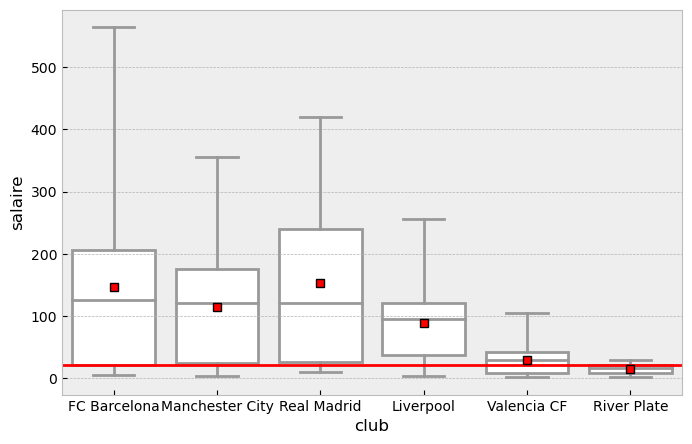

In [12]:
# Data visualization of salaries
pl.figure(figsize=(8, 5))

sns.boxplot(x='club', y='salaire', data=T6,
            whis=[0, 100], showmeans=True,
            color='white',
            meanprops = {'marker': 's', 'markerfacecolor': 'red', 'markeredgecolor': 'black'})

pl.axhline(y=m, color='red')
pl.show()

In [14]:
def fcc_pop(nom):
    S = T.query('club == @nom')
    N = len(S)
    return [k/N * 100 for k in range(N + 1)]

In [15]:
fcc_pop('Juventus')

[0.0,
 4.0,
 8.0,
 12.0,
 16.0,
 20.0,
 24.0,
 28.000000000000004,
 32.0,
 36.0,
 40.0,
 44.0,
 48.0,
 52.0,
 56.00000000000001,
 60.0,
 64.0,
 68.0,
 72.0,
 76.0,
 80.0,
 84.0,
 88.0,
 92.0,
 96.0,
 100.0]

In [16]:
def salaires(nom):
    s = T.query('club == @nom')
    colonne = s.sort_values('salaire')['salaire']
    return list(colonne)

In [19]:
print(salaires('Juventus'))

[5, 32, 44, 62, 78, 80, 91, 95, 95, 95, 105, 110, 125, 145, 150, 160, 160, 160, 160, 160, 175, 180, 205, 215, 405]


In [20]:
sum(salaires('Juventus'))

3292

In [21]:
# function to calculate cumulative frequencies for a given club's total salary mass
def fcc_mr(nom):
    F = [0]
    masse_sal = 0
    sal_club = salaires(nom)
    for sal in sal_club:
        masse_sal += sal
        F.append(masse_sal / sum(sal_club) * 100)
    return F

In [46]:
print(fcc_mr('Juventus'))

[0, 0.15188335358444716, 1.1239368165249088, 2.4605103280680436, 4.3438639125151886, 6.713244228432563, 9.143377885783718, 11.907654921020656, 14.793438639125153, 17.679222357229648, 20.565006075334143, 23.75455650060753, 27.095990279465372, 30.893074119076548, 35.297691373025515, 39.85419198055893, 44.714459295261236, 49.57472660996355, 54.434993924665854, 59.295261239368166, 64.15552855407047, 69.47144592952613, 74.93924665856622, 81.16646415552854, 87.69744835965977, 100.0]


In [47]:
def lorenz(nom, marque, couleur):
    pl.plot(fcc_pop(nom), fcc_mr(nom), marque, color=couleur, label=nom)

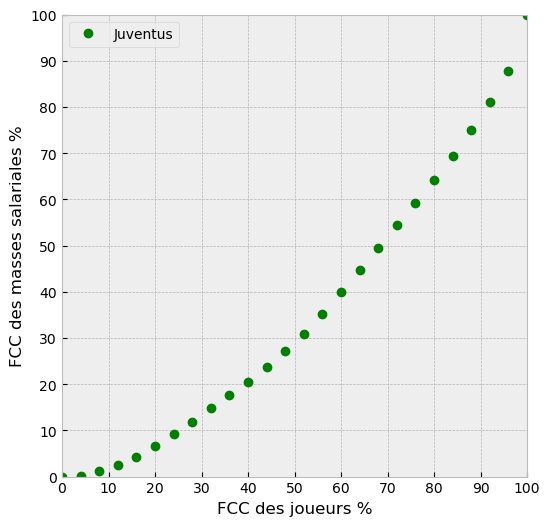

In [48]:
# example usage for Juventus
pl.figure(figsize=(6, 6))
pl.axis([0, 100, 0, 100])
pl.xticks(range(0, 110, 10))
pl.yticks(range(0, 110, 10))
pl.xlabel('FCC des joueurs %')
pl.ylabel('FCC des masses salariales %')
lorenz('Juventus', 'o', 'green')
pl.legend()

# Gini Index

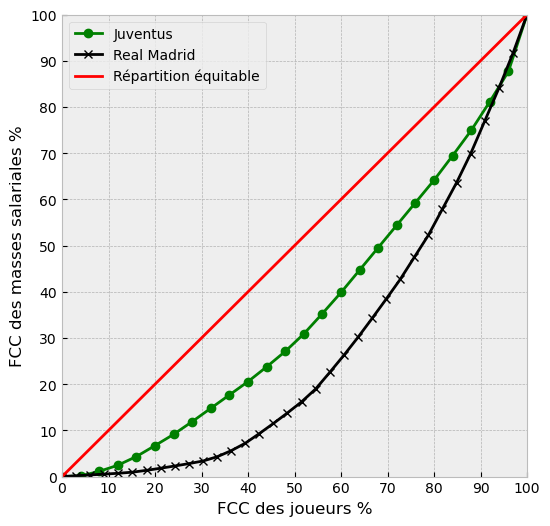

In [49]:
pl.figure(figsize=(6, 6))
pl.axis([0, 100, 0, 100])
pl.xticks(range(0, 110, 10))
pl.yticks(range(0, 110, 10))
pl.xlabel('FCC des joueurs %')
pl.ylabel('FCC des masses salariales %')
lorenz('Juventus', 'o-', 'green')
lorenz('Real Madrid', 'x-', 'black')
pl.plot([0, 100], [0, 100], color='red', label="Répartition équitable")
pl.legend()

# Gini Repartition

In [38]:
def trapèze(b,B,H):
    return (b+B)/2*H

In [39]:
X = fcc_pop('Juventus')
Y = fcc_mr('Juventus')

In [40]:
def aire(X, Y):
    A = 0
    for k in range(len(X) - 1):
        b = Y[k] / 100
        B = Y[k+1] / 100
        H = X[k+1] / 100 - X[k] / 100
        A = A + trapèze(b, B, H)
    return A

In [41]:
def gini(nom):
    return 1 - 2 * aire(fcc_pop(nom), fcc_mr(nom))

In [42]:
gini('Juventus')

0.2950182260024301

In [43]:
for nom in L:
    print(nom, gini(nom))

FC Barcelona 0.4788592979620476
River Plate 0.3346938775510204
Manchester City 0.4593651025086469
Liverpool 0.38932397719441136
Valencia CF 0.4254832810867293
Real Madrid 0.4609660487675238


# Fig

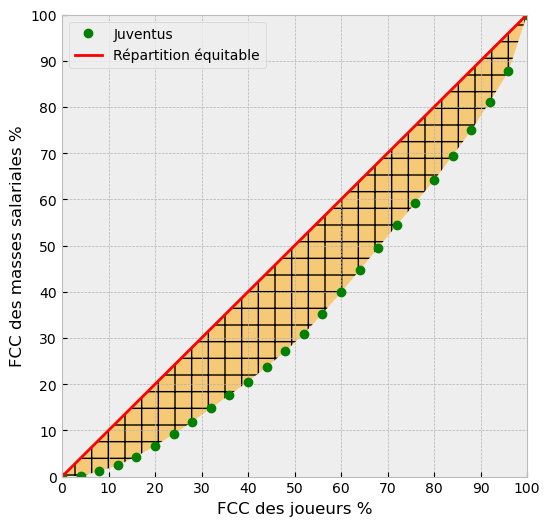

In [45]:
pl.figure(figsize=(6, 6))
pl.axis([0, 100, 0, 100])
pl.xticks(range(0, 110, 10))
pl.yticks(range(0, 110, 10))
pl.xlabel('FCC des joueurs %')
pl.ylabel('FCC des masses salariales %')
lorenz('Juventus', 'o', 'green')
pl.plot([0, 100], [0, 100], color='red', label="Répartition équitable")
pl.fill_between(fcc_pop('Juventus'), fcc_mr('Juventus'), fcc_pop('Juventus'), hatch='+', facecolor='orange', alpha=0.5)
pl.legend()
label='Indice de Gini = %.2f' % (2 * aire(fcc_pop('Juventus'), fcc_mr('Juventus')))

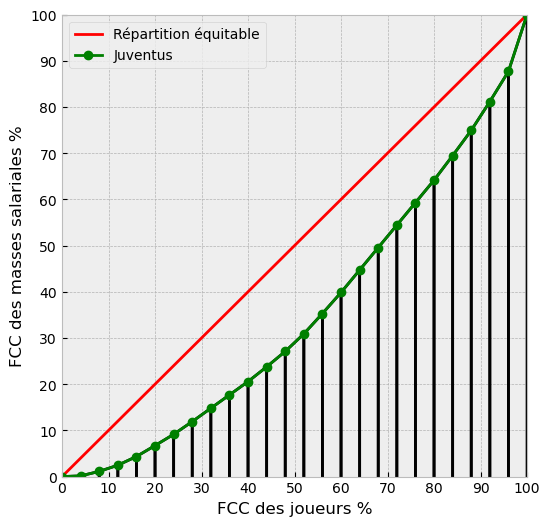

In [44]:
pl.figure(figsize=(6, 6))
pl.axis([0, 100, 0, 100])
pl.xticks(range(0, 110, 10))
pl.yticks(range(0, 110, 10))
pl.xlabel('FCC des joueurs %')
pl.ylabel('FCC des masses salariales %')
pl.plot([0, 100], [0, 100], color='red', label="Répartition équitable")
x = fcc_pop('Juventus')
y = fcc_mr('Juventus')
for k in range(len(x) - 1):
    pl.plot([x[k], x[k], x[k+1], x[k+1]], [0, y[k], y[k+1], 0], color='black')
lorenz('Juventus', 'o-', 'green')
pl.legend()